In [ ]:
# 1. 텐서플로 버전과 동직 확인 
import tensorflow as tf 

print(tf.__version__)
a = tf.random.uniform([2,3],0,1)
print(a)
print(type(a))

2.9.2
tf.Tensor(
[[0.31655514 0.03607905 0.6768186 ]
 [0.9512464  0.41091418 0.7302458 ]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
# 2. tensorflow와 numpy의 호환 
import tensorflow as tf 
import numpy as np

t = tf.random.uniform([2,3],0,1)
n=np.random.uniform(0,1,[2,3])
print('tensorflow로 생성한 텐서: \n',t,'\n')
print('numpy로 생성한 ndarray: \n',n,'\n')

res = t + n
print('덧셈 결과:\n',res)

tensorflow로 생성한 텐서: 
 tf.Tensor(
[[0.29167283 0.5495347  0.85204566]
 [0.4097494  0.46198452 0.31557107]], shape=(2, 3), dtype=float32) 

numpy로 생성한 ndarray: 
 [[0.30455245 0.57423494 0.87299057]
 [0.82978487 0.46611636 0.74466445]] 

덧셈 결과:
 tf.Tensor(
[[0.59622526 1.1237696  1.7250361 ]
 [1.2395343  0.9281009  1.0602355 ]], shape=(2, 3), dtype=float32)


In [ ]:
# 3. 텐서플로가 제공하는 데이터셋의 텐서 구조 확인하기 
import tensorflow as tf 
import tensorflow.keras.datasets as ds 

# MNIST 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.mnist.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("MNIST",x_train.shape,y_train.shape,yy_train.shape)

# CIFAR-10 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.cifar10.load_data()
yy_train=tf.one_hot(y_train,10,dtype=tf.int8)
print("CIFAR0-10",x_train.shape,y_train.shape,yy_train.shape)

# Boston Housing 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.boston_housing.load_data()
print("Boston Housing",x_train.shape,y_train.shape)

# Reuters 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.reuters.load_data()
print("Reuter",x_train.shape,y_train.shape)


MNIST (60000, 28, 28) (60000,) (60000, 10)
CIFAR0-10 (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)
Boston Housing (404, 13) (404,)
Reuter (8982,) (8982,)


In [ ]:
# 4. 텐서 플로 프로그래밍: [예제 4-1]의 퍼셉트론 동작
import tensorflow as tf 

# OR 데이터 구축 
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# [그림 4-3(b)]의 퍼셉트론
w=tf.Variable([[1.0],[1.0]])
b=tf.Variable(-0.5)

# 식 4.3의 퍼셉트론 동작
s=tf.add(tf.matmul(x,w),b)
o=tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


In [ ]:
# 5. 텐서플로 프로그래밍: 퍼셉트론 
import tensorflow as tf 

# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

# 가중치 초기화 
w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
b=tf.Variable(tf.zeros([1]))

# 옵티마이저 
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산(식 (4.3))
def forward():
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

# 손실 함수 정의 
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

# 500세대까지 학습 (100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])
  if(i%100==0): print('loss at epoch ',i,'=',loss().numpy())
  
# 학습된 퍼셉트론으로 OR데이터를 예측
o=forward()
print(o)

loss at epoch  0 = 0.5432834
loss at epoch  100 = 0.08592435
loss at epoch  200 = 0.04085208
loss at epoch  300 = 0.02597767
loss at epoch  400 = 0.018819831
tf.Tensor(
[[-0.8175079 ]
 [ 0.88707775]
 [ 0.8870899 ]
 [ 0.9992812 ]], shape=(4, 1), dtype=float32)


In [ ]:
# 6. 케라스 프로그래밍: 퍼셉트론 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# OR 데이터 구축 
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output,activation='tanh',
                     input_shape=(n_input,),kernel_initializer='random_uniform',
                     bias_initializer='zeros'))

perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),
                   metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 1.0181 - mse: 1.0181 - 360ms/epoch - 360ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7606 - mse: 0.7606 - 11ms/epoch - 11ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6469 - mse: 0.6469 - 8ms/epoch - 8ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5916 - mse: 0.5916 - 11ms/epoch - 11ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5584 - mse: 0.5584 - 8ms/epoch - 8ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5347 - mse: 0.5347 - 7ms/epoch - 7ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5157 - mse: 0.5157 - 8ms/epoch - 8ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4993 - mse: 0.4993 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4844 - mse: 0.4844 - 7ms/epoch - 7ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4705 - mse: 0.4705 - 8ms/epoch - 8ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4573 - mse: 0.4573 - 8ms/epoch - 8ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4448 - mse: 0.4448 - 7ms/epoch - 7ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4327 - mse: 0.4327 - 6ms/epoch - 6ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4210 - 

In [ ]:
# 7-a. 텐서플로 프로그래밍: 다층 퍼셉트론으로 MNIST 인식 

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,
              activation='tanh',
              input_shape=(n_input,),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))

mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy']
            )

hist = mlp.fit(x_train,
               y_train,
               batch_size=128,
               epochs=30,
               validation_data=(x_test,y_test),
               verbose=2
               )

res = mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은 ',res[1]*100)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 8s - loss: 0.0428 - accuracy: 0.8461 - val_loss: 0.0286 - val_accuracy: 0.9045 - 8s/epoch - 16ms/step
Epoch 2/30
469/469 - 7s - loss: 0.0225 - accuracy: 0.9281 - val_loss: 0.0185 - val_accuracy: 0.9422 - 7s/epoch - 16ms/step
Epoch 3/30
469/469 - 7s - loss: 0.0166 - accuracy: 0.9473 - val_loss: 0.0150 - val_accuracy: 0.9527 - 7s/epoch - 14ms/step
Epoch 4/30
469/469 - 8s - loss: 0.0139 - accuracy: 0.9568 - val_loss: 0.0131 - val_accuracy: 0.9579 - 8s/epoch - 17ms/step
Epoch 5/30
469/469 - 7s - loss: 0.0123 - accuracy: 0.9626 - val_loss: 0.0117 - val_accuracy: 0.9612 - 7s/epoch - 14ms/step
Epoch 6/30
469/469 - 7s - loss: 0.0110 - accuracy: 0.9668 - val_loss: 0.0111 - val_accuracy: 0.9645 - 7s/epoch - 14ms/step
Epoch 7/30
469/469 - 7s - loss: 0.0102 - accuracy: 0.9702 - val_loss: 0.0102 - val_accuracy: 0.9666 - 7s/epoch - 14ms/step
Epoch 8/30
469/469 - 7s - loss: 0.0095 - accuracy: 0.9722 - val_loss: 0.01

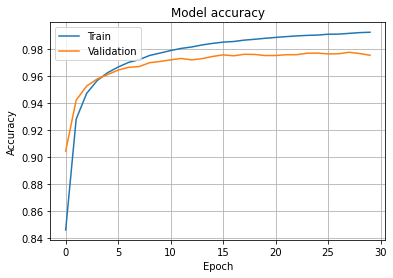

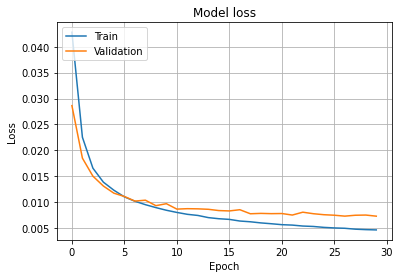

In [ ]:
# 7-b. 텐서플로 프로그래밍; 다층 퍼셉트론으로 MNIST 인식 

import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

Epoch 1/30
469/469 - 4s - loss: 0.1343 - accuracy: 0.0999 - val_loss: 0.1223 - val_accuracy: 0.1000 - 4s/epoch - 8ms/step
Epoch 2/30
469/469 - 1s - loss: 0.0776 - accuracy: 0.4491 - val_loss: 0.0309 - val_accuracy: 0.8292 - 1s/epoch - 3ms/step
Epoch 3/30
469/469 - 1s - loss: 0.0272 - accuracy: 0.8574 - val_loss: 0.0269 - val_accuracy: 0.8477 - 1s/epoch - 3ms/step
Epoch 4/30
469/469 - 1s - loss: 0.0251 - accuracy: 0.8677 - val_loss: 0.0264 - val_accuracy: 0.8590 - 1s/epoch - 3ms/step
Epoch 5/30
469/469 - 1s - loss: 0.0236 - accuracy: 0.8760 - val_loss: 0.0286 - val_accuracy: 0.8556 - 1s/epoch - 3ms/step
Epoch 6/30
469/469 - 1s - loss: 0.0223 - accuracy: 0.8808 - val_loss: 0.0231 - val_accuracy: 0.8649 - 1s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0214 - accuracy: 0.8857 - val_loss: 0.0233 - val_accuracy: 0.8724 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 1s - loss: 0.0206 - accuracy: 0.8901 - val_loss: 0.0231 - val_accuracy: 0.8710 - 1s/epoch - 3ms/step
Epoch 9/30
469/469 - 1s 

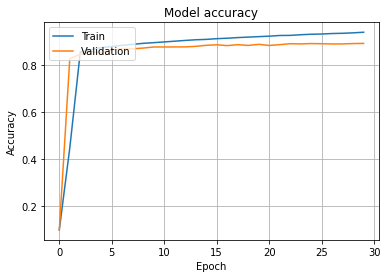

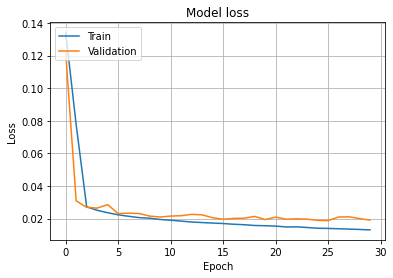

In [ ]:
# 8. 텐서플로 프로그래밍: 다층 퍼셉트론으로 fashion MNIST 인식

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,
              activation='tanh',
              input_shape=(n_input,),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))

mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy']
            )

hist = mlp.fit(x_train,
               y_train,
               batch_size=128,
               epochs=30,
               validation_data=(x_test,y_test),
               verbose=2
               )

res = mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은 ',res[1]*100)


import matplotlib.pyplot as plt

# 정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 9s - loss: 0.0256 - accuracy: 0.8982 - val_loss: 0.0122 - val_accuracy: 0.9464 - 9s/epoch - 19ms/step
Epoch 2/30
469/469 - 3s - loss: 0.0099 - accuracy: 0.9546 - val_loss: 0.0082 - val_accuracy: 0.9591 - 3s/epoch - 6ms/step
Epoch 3/30
469/469 - 3s - loss: 0.0066 - accuracy: 0.9681 - val_loss: 0.0063 - val_accuracy: 0.9691 - 3s/epoch - 7ms/step
Epoch 4/30
469/469 - 5s - loss: 0.0051 - accuracy: 0.9759 - val_loss: 0.0060 - val_accuracy: 0.9687 - 5s/epoch - 10ms/step
Epoch 5/30
469/469 - 3s - loss: 0.0041 - accuracy: 0.9809 - val_loss: 0.0054 - val_accuracy: 0.9703 - 3s/epoch - 6ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0036 - accuracy: 0.9831 - val_loss: 0.0057 - val_accuracy: 0.9711 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9854 - val_loss: 0.0047 - val_accuracy: 0.9754 - 2s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0027 - accuracy: 0.9877 - val_loss: 0.0056 - 

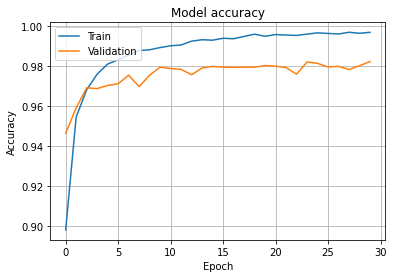

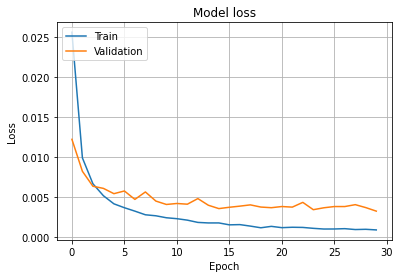

In [ ]:
# 9. 깊은 다층 퍼셉트론으로 MNIST 인식 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)  # 텐서 모양 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원힛 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

# 신경망 구조 설정 
mlp=Sequential()
mlp.add(Dense(units=n_hidden1,
              activation='tanh',
              input_shape=(n_input,),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))

mlp.add(Dense(units=n_hidden2,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'))
  
# 신경망 학습 
mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])
hist=mlp.fit(x_train,
             y_train,
             batch_size=128,
             epochs=30,
             validation_data=(x_test,y_test),
             verbose=2)


# 신경망의 정확도 측정 
res=mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은 ',res[1]*100)

import matplotlib.pyplot as plt

# 정확률 곡선 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()

# 손실 함수 곡선 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.grid()
plt.show()




Epoch 1/30
469/469 - 4s - loss: 0.0162 - accuracy: 0.8943 - val_loss: 0.0103 - val_accuracy: 0.9340 - 4s/epoch - 8ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0097 - accuracy: 0.9372 - val_loss: 0.0088 - val_accuracy: 0.9419 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0074 - accuracy: 0.9531 - val_loss: 0.0067 - val_accuracy: 0.9564 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0060 - accuracy: 0.9623 - val_loss: 0.0066 - val_accuracy: 0.9585 - 2s/epoch - 3ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0050 - accuracy: 0.9684 - val_loss: 0.0052 - val_accuracy: 0.9655 - 2s/epoch - 3ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0043 - accuracy: 0.9739 - val_loss: 0.0047 - val_accuracy: 0.9691 - 2s/epoch - 3ms/step
Epoch 7/30
469/469 - 1s - loss: 0.0037 - accuracy: 0.9775 - val_loss: 0.0046 - val_accuracy: 0.9692 - 1s/epoch - 3ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0032 - accuracy: 0.9811 - val_loss: 0.0043 - val_accuracy: 0.9714 - 2s/epoch - 3ms/step
Epoch 9/30
469/469 - 2s 

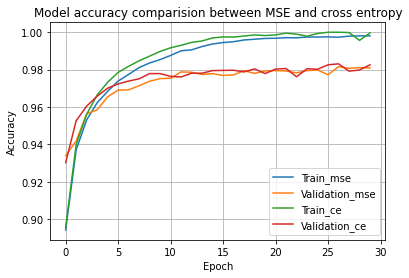

In [ ]:
# 10. 손실 함수의 성능 비교: 평균제곱오차와 교차 엔트로피
import numpy as np
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정 
n_input=784
n_hidden = [1024,512,512,512]
n_output=10

# 평균제곱오차를 사용한 모델
dmlp_mse = Sequential()
dmlp_mse.add(Dense(units=n_hidden[0],activation='tanh',input_shape=(n_input,)))
for i in range(3):
  dmlp_mse.add(Dense(units=n_hidden[i+1],activation='tanh'))
dmlp_mse.add(Dense(units=n_output,activation='softmax'))
dmlp_mse.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_mse=dmlp_mse.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 교차 엔트로피를 사용한 모델
dmlp_ce=Sequential()
dmlp_ce.add(Dense(units=n_hidden[0],activation='tanh',input_shape=(n_input,)))
for i in range(3):
  dmlp_ce.add(Dense(units=n_hidden[i+1],activation='tanh'))
dmlp_ce.add(Dense(units=n_output,activation='softmax'))
dmlp_ce.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
hist_ce = dmlp_ce.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 두 모델의 정확률 비교
res_mse = dmlp_mse.evaluate(x_test,y_test,verbose=0)
print("평균제곱오치의 정확률은 ",res_mse[1]*100)
res_ce = dmlp_ce.evaluate(x_test,y_test,verbose=0)
print('교차 엔트로피의 정확률은 ',res_ce[1]*100)

# 하나의 그래프에서 두 모델을 비교
import matplotlib.pyplot as plt 
plt.plot(hist_mse.history['accuracy'])
plt.plot(hist_mse.history['val_accuracy'])
plt.plot(hist_ce.history['accuracy'])
plt.plot(hist_ce.history['val_accuracy'])
plt.title('Model accuracy comparision between MSE and cross entropy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_mse','Validation_mse','Train_ce','Validation_ce'],loc='best')
plt.grid()
plt.show()

Epoch 1/50
235/235 - 1s - loss: 1.3491 - accuracy: 0.6161 - val_loss: 0.8528 - val_accuracy: 0.6850 - 1s/epoch - 6ms/step
Epoch 2/50
235/235 - 1s - loss: 0.7275 - accuracy: 0.7526 - val_loss: 0.6677 - val_accuracy: 0.7776 - 834ms/epoch - 4ms/step
Epoch 3/50
235/235 - 1s - loss: 0.6103 - accuracy: 0.7932 - val_loss: 0.6507 - val_accuracy: 0.7486 - 852ms/epoch - 4ms/step
Epoch 4/50
235/235 - 1s - loss: 0.5512 - accuracy: 0.8112 - val_loss: 0.5676 - val_accuracy: 0.7957 - 787ms/epoch - 3ms/step
Epoch 5/50
235/235 - 1s - loss: 0.5113 - accuracy: 0.8227 - val_loss: 0.5378 - val_accuracy: 0.8077 - 807ms/epoch - 3ms/step
Epoch 6/50
235/235 - 1s - loss: 0.4926 - accuracy: 0.8276 - val_loss: 0.5344 - val_accuracy: 0.8094 - 818ms/epoch - 3ms/step
Epoch 7/50
235/235 - 1s - loss: 0.4709 - accuracy: 0.8352 - val_loss: 0.4948 - val_accuracy: 0.8267 - 747ms/epoch - 3ms/step
Epoch 8/50
235/235 - 1s - loss: 0.4547 - accuracy: 0.8414 - val_loss: 0.4972 - val_accuracy: 0.8219 - 808ms/epoch - 3ms/step
Epo

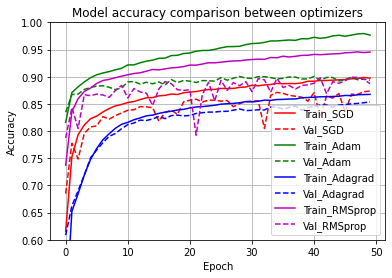

In [ ]:
# 11. 옵티마이저의 성능 비교: SGD,Adam,Adagrad,RMSprop

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop

# fashion MNIST 읽어 와서 신경망에 입력할 형태로 변환 
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input = 784
n_hidden = [1024,512,512,512]
n_output = 10

# 하이퍼 매개변수 설정
batch_size=256
n_epoch=50

# 모델을 설계해주는 함수 (모델을 나타내는 객체 model을 반환)
def build_model():
  model=Sequential()
  model.add(Dense(units=n_hidden[0],activation='relu',input_shape=(n_input,)))
  for i in range(3): model.add(Dense(units=n_hidden[i+1],activation='relu'))
  model.add(Dense(units=n_output,activation='softmax'))
  return model 

# 옵티마이저들과 해당 옵티마이저를 사용하는 모델 생성
optimizers = [SGD, Adam, Adagrad, RMSprop]
dmlp = {}
hist = {}

for optimizer in optimizers:
  dmlp[optimizer] = build_model()
  dmlp[optimizer].compile(loss='categorical_crossentropy', optimizer=optimizer(), metrics=['accuracy'])
  hist[optimizer] = dmlp[optimizer].fit(x_train, y_train, batch_size=batch_size, epochs=n_epoch,validation_data=(x_test,y_test),verbose=2)

# 네 모델의 정확률 측정
for optimizer in dmlp.keys():
  print(optimizer.__name__, ' 정확률은 ',dmlp[optimizer].evaluate(x_test, y_test, verbose=0)[1]*100)

import matplotlib.pyplot as plt

graph_color = {
    SGD:'r',
    Adam:'g',
    Adagrad:'b',
    RMSprop:'m'    
}
# 네 모델의 정확률을 하나의 그래프에서 비교
for optimizer in (hist.keys()):
  plt.plot(hist[optimizer].history['accuracy'],graph_color[optimizer],label='Train_'+optimizer.__name__)
  plt.plot(hist[optimizer].history['val_accuracy'],graph_color[optimizer]+'--',label='Val_'+optimizer.__name__)

plt.title('Model accuracy comparison between optimizers')
plt.ylim((0.6,1.0))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

  

SGD  :  0.856766676902771
Adam  :  0.8939666628837586
Adagrad  :  0.8335166692733764
RMSprop  :  0.8882833242416381


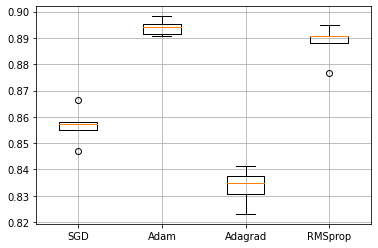

In [9]:
# 12. 교차 검증을 이용한 옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

# fashion MNIST를 읽고 신경망에 입력할 형태로 변환
trans_input = lambda x : x.reshape(x.shape[0],x.shape[1]*x.shape[2]).astype(np.float32)/255.0
data_categorical = lambda y : tf.keras.utils.to_categorical(y,10)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = trans_input(x_train)
x_test = trans_input(x_test)

y_train = data_categorical(y_train)
y_test = data_categorical(y_test)

# 신경망 구조 설정 
n_input = 784
n_hidden = [1024, 512, 512, 512]
n_output = 10

# 하이퍼 매개 변수 설정 
batch_size = 256
n_epoch = 20
k = 5

# 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
def build_model():
  model = Sequential()
  model.add(Dense(units=n_hidden[0], activation='relu', input_shape=(n_input,)))
  for i in range(3):
    model.add(Dense(units=n_hidden[i+1], activation='relu'))
  model.add(Dense(units=n_output, activation='softmax'))
  return model 

# 교차 검증을 해주는 함수 (서로 다른 옵티마이저(opt)에 대해)
def cross_validation(opt):
  accuracy = []
  for train_idx, val_idx in KFold(k).split(x_train):
    xtrain, xval = x_train[train_idx], x_train[val_idx]
    ytrain, yval = y_train[train_idx], y_train[val_idx]
    dmlp = build_model()
    dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=0)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
  return accuracy

# 옵티마이저 4개에 대해 교차검증을 실행 
optimizers = [SGD, Adam, Adagrad, RMSprop]
acc = {}
for opt in optimizers: acc[opt] = cross_validation(opt())
for opt in optimizers: print(opt.__name__, ' : ', np.array(acc[opt]).mean())

import matplotlib.pyplot as plt 
plt.boxplot([acc[opt] for opt in optimizers], labels=[opt.__name__ for opt in optimizers])
plt.grid()
plt.show()

In [ ]:
# 연습문제 1[프로그램 5-3]은 Boston Housing과 Reuters 데이터의 모양만 제시한다.
# 데이터의 내용을 조사하는 프로그램으로 확장하시오.
# 프로그램의 출력을 살피고 인터넷에서 검색해 두 데이터의 내용을 상세히 조사하시오.
import tensorflow as tf 
import tensorflow.keras.datasets as ds

# Boston Housing 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.boston_housing.load_data()
print("Boston Housing",x_train.shape,y_train.shape)
print('x train==================================================================\n',x_train)
print('y train==================================================================\n',y_train)
print('x test==================================================================\n',x_test)
print('y test==================================================================\n',y_test)

# Reuters 읽고 텐서 모양 출력 
(x_train, y_train),(x_test,y_test) = ds.reuters.load_data()
print("Reuter",x_train.shape,y_train.shape)
print('x train==================================================================\n',x_train)
print('y train==================================================================\n',y_train)
print('x test==================================================================\n',x_test)
print('y test==================================================================\n',y_test)

print('데이터 사이즈==============================================================')
print('훈련 데이터: ',(len(x_train)))
print('테스트 데이터: ',format(len(x_test)))
print('카테고리: ',max(y_train)+1)

print('단어 종류 ==============================================================')
index_to_word = {val : key for key, val in ds.reuters.get_word_index().items()}
print(sorted(index_to_word.items()))
print(sorted(index_to_word.items(),reverse=True))
print(' '.join([index_to_word[x] for x in x_train[0]]))

# 보스턴 주택 가격 회귀 데이터 세트 
# 보스턴 주택 가격 데이터 속성은 아래와 같다.
# CRIM    [0]   자치시(town) 별 1인당 범죄율
# ZN      [1]   25,000 평방피트를 초과하는 거주지역의 비율
# INDUS   [2]   비소매상업지역이 점유하고 있는 토지의 비율
# CHAS    [3]   찰스강에 대해 더미변수 (강의 경계에 위치한 경우는 1, 아니면 0)
# NOX     [4]   10ppm 당 농축 일산지질소 
# RM      [5]   주택 1가구당 평균 방의 개수 
# AGE     [6]   1940년 이전에 건축된 소유주택의 비율
# DIS     [7]   5개의 보스턴 직업센터까지의 접근성 지수
# RAD     [8]   방사형 도로까지의 접근성 지수 
# TAX     [9]   10,000달러 당 재산 세율 
# PTRATIO [10]  자치시(town)려별 학생-교사 비율
# B       [11]  1000(Bk-0.63)^2, 여기서 Bk는 자치시별 흑인의 비율을 말함
# LSTAT   [12]  모집단의 하위계층의 비율(%)
# MEDV    [13]  본인 소유의 주택가격(중앙값)(단위:$1,000)


# Reuters dataset
# 로이터 뉴스의 토픽을 분류해둔 dataset이다
# data의 경우 단어들을 미리 indexing하여 변환해두었으며 
# indexing한 데이터의 정보를 보기 위해선 
# reuters.get_word_index() 함수를 이용하면 된다,

# 분류된 토픽들은 아래와 같다 
# keras datasets의 category들은 찾을 수 없어서 정확하지 않다.
# topic = ['cocoa','grain','veg-oil','earn','acq','wheat','copper','housing','money-supply',
#  'coffee','sugar','trade','reserves','ship','cotton','carcass','crude','nat-gas',
#  'cpi','money-fx','interest','gnp','meal-feed','alum','oilseed','gold','tin',
#  'strategic-metal','livestock','retail','ipi','iron-steel','rubber','heat','jobs',
#  'lei','bop','zinc','orange','pet-chem','dlr','gas','silver','wpi','hog','lead']

Boston Housing (404, 13) (404,)
x train==================================================================
 [[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
y train==================================================================
 [15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14

In [ ]:
# 연습문제 2 [프로그램 5-5]는 세대 수 500까지 학습한다. 세대 수를 늘리고 어떤 현상이 생기는지 확인하시오.
# 5. 텐서플로 프로그래밍: 퍼셉트론 
import tensorflow as tf 
from time import time 

# 가중치 초기화 
def init_weight():
  w=tf.Variable(tf.random.uniform([2,1],-0.5,0.5))
  b=tf.Variable(tf.zeros([1]))
  return w,b

# 전방 계산(식 (4.3))
def forward(x,w,b):
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

def optimizing(epoch,optimizer,lossfunc,x,w,b):
  for i in range(epoch):
    optimizer.minimize(lossfunc, var_list=[w,b])
    if(i%100==0): print('loss at epoch ',i,'=',lossfunc().numpy())
  return w,b


# OR 데이터 구축
x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]
    
# 옵티마이저 
opt=tf.keras.optimizers.SGD(learning_rate=0.1)

loss = lambda: tf.reduce_mean((y-forward(x,w,b))**2)


# 500세대까지 학습 (100세대마다 학습 정보 출력)
weight = {}
for epoch in range(100,700,100):
  start = time()
  w,b = init_weight()
  optimizing(epoch,opt,loss,x,w,b)
  weight[epoch] = w,b
  end = time()
  print("epoch",epoch," 학습하는데 걸린 시간은 ",end-start)


  
# 학습된 퍼셉트론으로 OR데이터를 예측
for epoch in range(100,700,100):
  print(forward(x,*weight[epoch]))

# 세대수가 늘어날 수록 학습하는데 걸리는 시간은 증가하며 
# 값을 점점 정확하게 예측한다.
# 또한 tanh 의 값도 값에 정확해진다.

loss at epoch  0 = 0.9333935
epoch 100  학습하는데 걸린 시간은  0.5230503082275391
loss at epoch  0 = 1.5094231
loss at epoch  100 = 0.10234793
epoch 200  학습하는데 걸린 시간은  0.6480221748352051
loss at epoch  0 = 1.0413448
loss at epoch  100 = 0.09648832
loss at epoch  200 = 0.043464933
epoch 300  학습하는데 걸린 시간은  0.9599535465240479
loss at epoch  0 = 0.56714964
loss at epoch  100 = 0.08608906
loss at epoch  200 = 0.040892284
loss at epoch  300 = 0.025994815
epoch 400  학습하는데 걸린 시간은  1.2436840534210205
loss at epoch  0 = 0.6136756
loss at epoch  100 = 0.08810877
loss at epoch  200 = 0.04141183
loss at epoch  300 = 0.026216589
loss at epoch  400 = 0.01894916
epoch 500  학습하는데 걸린 시간은  1.532156229019165
loss at epoch  0 = 0.7116666
loss at epoch  100 = 0.089350484
loss at epoch  200 = 0.041719995
loss at epoch  300 = 0.026347075
loss at epoch  400 = 0.019019559
loss at epoch  500 = 0.014791992
epoch 600  학습하는데 걸린 시간은  1.8337254524230957
tf.Tensor(
[[-0.52317244]
 [ 0.7203119 ]
 [ 0.71935624]
 [ 0.98352206]], 

In [ ]:
# 연습문제 3 5.3.3항에 있는 Note '케라스의 지위 업 또는 다운'을 읽고 케라스의 지위가 약해진 것인지 강해진 것인지에 대한 자신의 의견을 제시하시오.
# 이전에는 keras가 tensorflow를 사용하면서 필요한 사람들이 별도로 사용하는 라이브러리 였다면 
# 현재는 keras가 tensorflow내에 편입되며 별도로 추가하지않아도 사용할 수 있게 되었으며 
# tensorflow와 거의 항상 같이 쓰이므로 지휘가 올라갔다고 생각한다.

In [ ]:
# 연습문제 4 [프로그램 5-9]의 27~31 행에 있는 가중치를 초기화하는 매개변수를 glorot_uniform과 glorot_normal, random_uniform으로 바꾸면서 성능을 비교하시오.
# 9. 깊은 다층 퍼셉트론으로 MNIST 인식 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)  # 텐서 모양 변환 
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) # 원힛 코드로 변환
y_test = tf.keras.utils.to_categorical(y_test,10)

# 신경망 구조 설정
n_input=784
n_hidden = [1024,512,512,512]
n_output = 10

# 신경망 구조 설정 
def build_model(input, hidden, output, option_dict):
  model = Sequential()
  model.add(Dense(units=hidden[0],input_shape=(input,),**option_dict))
  for i in range(1,len(hidden)): model.add(Dense(units=hidden[i],**option_dict))
  model.add(Dense(units=output,**option_dict))
  return model  

option_dict = {
    'activation':'tanh',
    'kernel_initializer':'random_uniform',
    'bias_initializer':'zeros'
    }

kernel_initializer = ['glorot_uniform','glorot_normal','random_uniform']
mlp = {}
hist = {}
res = {}

for kernel_init in kernel_initializer:
  option_dict['kernel_initializer'] = kernel_init
  mlp[kernel_init] = build_model(n_input,n_hidden,n_output,option_dict)
  mlp[kernel_init].compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
  hist[kernel_init] = mlp[kernel_init].fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

  # 신경망의 정확도 측정 
  res[kernel_init] = mlp[kernel_init].evaluate(x_test,y_test,verbose=0)
  print(kernel_init,' 학습 완료 정확률은 ',res[kernel_init][1]*100)



import matplotlib.pyplot as plt

# 정확률 곡선 
for kernel_init in kernel_initializer:
  plt.plot(hist[kernel_init].history['accuracy'],label=kernel_init+'Train')
  plt.plot(hist[kernel_init].history['val_accuracy'],label=kernel_init+'Val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# 손실 함수 곡선 
for kernel_init in kernel_initializer:
  plt.plot(hist[kernel_init].history['loss'],label=kernel_init+'Train')
  plt.plot(hist[kernel_init].history['val_loss'],label=kernel_init+'Val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()



In [ ]:
# 연습문제 5 Glorot 초기화 (Xavier 초기화라고도 함)의 원리를 조사하고 설명하시오.
# Xavier Initialization 혹은 Glorot Initialization라고도 불리는 초기화 방법은 이전 노드와 다음 노드의 개수에 의존하는 방법이다. 
# Uniform 분포를 따르는 방법과 Normal분포를 따르는 두가지 방법이 사용된다
# glorot normal var(W) = root(2/(n_input+n_output))
# glorot uniform W~U(-root(6/(n_input+n_output)), root(6/(n_input+n_output)))

# Xavier 초기화는 Glorot et al.가 자신의 이름을 따서 만든 초기화 방식으로 각층의정보, 
# 즉 특징들을 넓게 분포시키는 균일 분포에 기반을 둔 방법이다. 
# Xavier 초기화에서는 앞 계층의 노드 (Node)가 n개일 때 표준편차를 root(1/n) 로 설정한다.


In [1]:
# 연습문제 6 [프로그램 5-12]를 colab에서 실행하면서 병렬 처리를 활용하지 않았을 때,
# GPU를 사용했을 때, TPU를 사용했을 때 소요된 시간을 비교 하시오.
# 12. 교차 검증을 이용한 옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold
def program_5_12():
  # fashion MNIST를 읽고 신경망에 입력할 형태로 변환
  trans_input = lambda x : x.reshape(x.shape[0],x.shape[1]*x.shape[2]).astype(np.float32)/255.0
  data_categorical = lambda y : tf.keras.utils.to_categorical(y,10)

  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

  x_train = trans_input(x_train)
  x_test = trans_input(x_test)

  y_train = data_categorical(y_train)
  y_test = data_categorical(y_test)

  # 신경망 구조 설정 
  n_input = 784
  n_hidden = [1024, 512, 512, 512]
  n_output = 10

  # 하이퍼 매개 변수 설정 
  batch_size = 256
  n_epoch = 20
  k = 2
  # k = 5

  # 모델을 설계해주는 함수(모델을 나타내는 객체 model을 반환)
  def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden[0], activation='relu', input_shape=(n_input,)))
    for i in range(3):
      model.add(Dense(units=n_hidden[i+1], activation='relu'))
    model.add(Dense(units=n_output, activation='softmax'))
    return model 

  # 교차 검증을 해주는 함수 (서로 다른 옵티마이저(opt)에 대해)
  def cross_validation(opt):
    accuracy = []
    for idx, (train_idx, val_idx) in enumerate(KFold(k).split(x_train)):
      print(idx, 'kfold')
      xtrain, xval = x_train[train_idx], x_train[val_idx]
      ytrain, yval = y_train[train_idx], y_train[val_idx]
      dmlp = build_model()
      dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
      dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch, verbose=2)
      accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
    return accuracy

  # 옵티마이저 4개에 대해 교차검증을 실행 
  optimizers = [SGD, Adam, Adagrad, RMSprop] 
  acc = {}
  for opt in optimizers: 
    print('\n\n\n\n',opt.__name__,'start')
    acc[opt] = cross_validation(opt())
  for opt in optimizers: print(opt.__name__, ' : ', np.array(acc[opt]).mean())

  import matplotlib.pyplot as plt 
  plt.boxplot([acc[opt] for opt in optimizers], labels=[opt.__name__ for opt in optimizers])
  plt.grid()
  plt.show()

4422102/4422102 [==============================] - 0s 0us/step




 SGD start
0 kfold
Epoch 1/20
118/118 - 18s - loss: 1.7494 - accuracy: 0.5239 - 18s/epoch - 156ms/step
Epoch 2/20
118/118 - 12s - loss: 0.9838 - accuracy: 0.6872 - 12s/epoch - 101ms/step
Epoch 3/20
118/118 - 9s - loss: 0.7677 - accuracy: 0.7447 - 9s/epoch - 77ms/step
Epoch 4/20
118/118 - 6s - loss: 0.6794 - accuracy: 0.7741 - 6s/epoch - 52ms/step
Epoch 5/20
118/118 - 6s - loss: 0.6220 - accuracy: 0.7924 - 6s/epoch - 52ms/step
Epoch 6/20
118/118 - 6s - loss: 0.5826 - accuracy: 0.8031 - 6s/epoch - 52ms/step
Epoch 7/20
118/118 - 6s - loss: 0.5565 - accuracy: 0.8104 - 6s/epoch - 52ms/step
Epoch 8/20
118/118 - 6s - loss: 0.5359 - accuracy: 0.8160 - 6s/epoch - 52ms/step
Epoch 9/20
118/118 - 6s - loss: 0.5128 - accuracy: 0.8260 - 6s/epoch - 52ms/step
Epoch 10/20
118/118 - 6s - loss: 0.5019 - accuracy: 0.8253 - 6s/epoch - 52ms/step
Epoch 11/20
118/118 - 6s - loss: 0.4883 - accuracy: 0.8309 - 6s/epoch - 52ms/step
Epoch 12/20
118

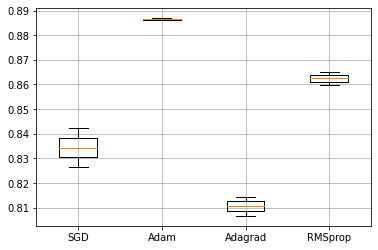

병렬처리 활용하지 않을 때 걸린 시간 1149.7453756332397


In [2]:
# 병렬처리 활용하지 않을 때
from time import time
start = time()
program_5_12()
print('병렬처리 활용하지 않을 때 걸린 시간',time() - start)

SGD start
0 kfold
Epoch 1/20
118/118 - 1s - loss: 1.7073 - accuracy: 0.5589 - 977ms/epoch - 8ms/step
Epoch 2/20
118/118 - 0s - loss: 0.9537 - accuracy: 0.6922 - 367ms/epoch - 3ms/step
Epoch 3/20
118/118 - 0s - loss: 0.7619 - accuracy: 0.7456 - 338ms/epoch - 3ms/step
Epoch 4/20
118/118 - 0s - loss: 0.6762 - accuracy: 0.7748 - 340ms/epoch - 3ms/step
Epoch 5/20
118/118 - 0s - loss: 0.6208 - accuracy: 0.7905 - 348ms/epoch - 3ms/step
Epoch 6/20
118/118 - 0s - loss: 0.5835 - accuracy: 0.8026 - 351ms/epoch - 3ms/step
Epoch 7/20
118/118 - 0s - loss: 0.5573 - accuracy: 0.8116 - 338ms/epoch - 3ms/step
Epoch 8/20
118/118 - 0s - loss: 0.5339 - accuracy: 0.8151 - 328ms/epoch - 3ms/step
Epoch 9/20
118/118 - 0s - loss: 0.5184 - accuracy: 0.8207 - 322ms/epoch - 3ms/step
Epoch 10/20
118/118 - 0s - loss: 0.4995 - accuracy: 0.8260 - 329ms/epoch - 3ms/step
Epoch 11/20
118/118 - 0s - loss: 0.4884 - accuracy: 0.8319 - 322ms/epoch - 3ms/step
Epoch 12/20
118/118 - 0s - loss: 0.4814 - accuracy: 0.8324 - 318ms/

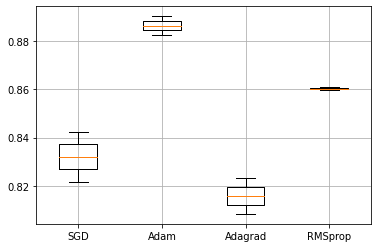

GPU 사용할 때 걸린 시간 95.75646376609802


In [8]:
# GPU 사용할 때
from time import time
start = time()
program_5_12()
print('GPU 사용할 때 걸린 시간',time() - start)

4422102/4422102 [==============================] - 0s 0us/step




 SGD start
0 kfold
Epoch 1/20
118/118 - 14s - loss: 1.7382 - accuracy: 0.5392 - 14s/epoch - 123ms/step
Epoch 2/20
118/118 - 11s - loss: 0.9646 - accuracy: 0.6947 - 11s/epoch - 97ms/step
Epoch 3/20
118/118 - 6s - loss: 0.7580 - accuracy: 0.7470 - 6s/epoch - 53ms/step
Epoch 4/20
118/118 - 6s - loss: 0.6751 - accuracy: 0.7717 - 6s/epoch - 52ms/step
Epoch 5/20
118/118 - 6s - loss: 0.6206 - accuracy: 0.7911 - 6s/epoch - 52ms/step
Epoch 6/20
118/118 - 6s - loss: 0.5833 - accuracy: 0.8008 - 6s/epoch - 52ms/step
Epoch 7/20
118/118 - 6s - loss: 0.5596 - accuracy: 0.8071 - 6s/epoch - 52ms/step
Epoch 8/20
118/118 - 6s - loss: 0.5384 - accuracy: 0.8121 - 6s/epoch - 52ms/step
Epoch 9/20
118/118 - 6s - loss: 0.5178 - accuracy: 0.8205 - 6s/epoch - 52ms/step
Epoch 10/20
118/118 - 6s - loss: 0.5066 - accuracy: 0.8238 - 6s/epoch - 51ms/step
Epoch 11/20
118/118 - 6s - loss: 0.4914 - accuracy: 0.8285 - 6s/epoch - 51ms/step
Epoch 12/20
118/

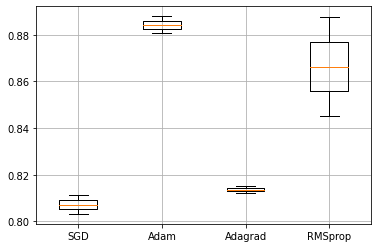

TPU 사용할 때 걸린 시간 1133.5651595592499


In [2]:
# TPU 사용할 때
from time import time
start = time()
program_5_12()
print('TPU 사용할 때 걸린 시간',time() - start)

In [ ]:
# 연습문제 7 텐서플로는 SGD, Adagrad, RMSprop, Adam 옵티마이저 외에 Adadelta, Adamax, Nadam을 제공한다.
# 이들의 API와 동작원리를 5.8.2항처럼 제시하시오.

# Adadelta 

# tf.keras.optimizers.Adadelta(
#   learning_rate=0.001,
#   rho=0.95,
#   epsilon=1e-07,
#   weight_decay=None,
#   clipnorm=None,
#   clipvalue=None,
#   global_clipnorm=None,
#   use_ema=False,
#   ema_momentum=0.99,
#   ema_overwrite_frequency=None,
#   jit_compile=True,
#   name="Adadelta",
#   **kwargs
# )


# Adamax
# Adamax는 Adam의 vt텀에 다른 norm을 사용한 방법

# tf.keras.optimizers.Adamax(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name="Adamax",
#     **kwargs
# )


# Nadam
# NAG와 Adam을 섞은 방법 

# tf.keras.optimizers.Nadam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     weight_decay=None,
#     clipnorm=None,
#     clipvalue=None,
#     global_clipnorm=None,
#     use_ema=False,
#     ema_momentum=0.99,
#     ema_overwrite_frequency=None,
#     jit_compile=True,
#     name="Nadam",
#     **kwargs
# )



In [ ]:
# 연습문제 8 샘플의 부류 레이블이 y=(0,0,1,0)인데 모델이 o=(0.01,0.09,0.8,0.1)을 예측했을 때의 교차 엔트로피를 계산하시오.
# 또 다른 모델이 o=(0.97,0.01,0.01,0.01)을 예측했을 때의 교차 엔트로피를 계산하시오.
# 그리고 두 경우를 비교해 교차 엔트로피의 합리성을 설명하시오.

import numpy as np 
y = np.array([0,0,1,0])
o1 = np.array([0.01, 0.09, 0.8, 0.1])
o2 = np.array([0.97, 0.01, 0.01, 0.01])

cross_entropy = lambda y,o : -np.sum(y*np.log(o+1e-10))

print(cross_entropy(y,o1))
print(cross_entropy(y,o2))

0.2231435513142097
4.605170185988091


In [ ]:
# 연습문제 9 [프로그램 5-7(a)]의 행 13~16은 신경망에 입력할 수 있는 형태의 x_train, x_train, y_train, y_test를 만든다.
# 이들 텐서의 모양을 [그림 5-5]와 같이 그리시오.

# 7-a. 텐서플로 프로그래밍: 다층 퍼셉트론으로 MNIST 인식 

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# MNIST 읽어 와서 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784) # 텐서 모양 변환
x_test = x_test.reshape(10000,784)
x_train = x_train.astype(np.float32)/255.0 # ndarray로 변환
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10) # 원핫 코드로 변환
y_test=tf.keras.utils.to_categorical(y_test,10)

n_input=784
n_hidden=1024
n_output=10

mlp=Sequential()
mlp.add(Dense(units=n_hidden,
              activation='tanh',
              input_shape=(n_input,),
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))
mlp.add(Dense(units=n_output,
              activation='tanh',
              kernel_initializer='random_uniform',
              bias_initializer='zeros'
              ))

mlp.compile(loss='mean_squared_error',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy']
            )

hist = mlp.fit(x_train,
               y_train,
               batch_size=128,
               epochs=30,
               validation_data=(x_test,y_test),
               verbose=2
               )

res = mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은 ',res[1]*100)

# [그림 5-5]처럼 3차원의 데이터가 아닌 입력할 부분을 2차원 데이터에서 1차원 데이터로 변경하고 
# 그 외의 데이터의 갯수는 유지한다.

In [2]:
# 연습문제 10 [프로그램 5-6]이 생성한 perceptron 모델과 [프로그램 5-7(a)]가 생성한 
# mlp 모델의 가중치 개수를 계산식과 함께 제시하시오.
# 가중치의 개수를 알아내는 파이썬 명령어는 무엇인지 쓰고,
# 명령어를 실행해 얻은 출력 결과를 제시하시오.

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD


# 신경망 구조 설정 
def build_model(input, hidden, output, option_dict):
  model = Sequential()
  if len(hidden) == 0: model.add(Dense(units=output,input_shape=(input,),**option_dict))
  else:
    model.add(Dense(units=hidden[0],input_shape=(input,),**option_dict))
    for i in range(1,len(hidden)): model.add(Dense(units=hidden[i],**option_dict))
    model.add(Dense(units=output,**option_dict))
  return model  

trans_input = lambda x : x.reshape(x.shape[0],x.shape[1]*x.shape[2]).astype(np.float32)/255.0
data_categorical = lambda y : tf.keras.utils.to_categorical(y,10)

# 6. 케라스 프로그래밍: 퍼셉트론 학습

x=[[0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input = 2
n_hidden = []
n_output = 1
option_dict = {
    'activation':'tanh',
    'kernel_initializer':'random_uniform',
    'bias_initializer':'zeros'
    }

perceptron=build_model(n_input, n_hidden, n_output, option_dict)
perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)
res=perceptron.predict(x)
print(res)

# 7-a. 텐서플로 프로그래밍: 다층 퍼셉트론으로 MNIST 인식 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = trans_input(x_train), trans_input(x_test)
y_train, y_test = data_categorical(y_train), data_categorical(y_test)

n_input=784
n_hidden=[1024]
n_output=10

option_dict = {
    'activation':'tanh',           
    'kernel_initializer':'random_uniform',
    'bias_initializer':'zeros'          
    }

mlp=build_model(n_input,n_hidden,n_output,option_dict)
mlp.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

res = mlp.evaluate(x_test,y_test,verbose=0)
print('정확률은 ',res[1]*100)

# model.summary()
# print(model.get_layer(model.layers[0].name) in mlp.layers)

get_model_weights = lambda model : np.array([layer.get_weights() for layer in model.layers])

perceptron.summary()
print(get_model_weights(perceptron))
print(len(get_model_weights(perceptron)))


print('\n\n\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\n\n\n')

mlp.summary()
print(len(get_model_weights(mlp)[0]))
print(len(get_model_weights(mlp)[1]))
print(len(get_model_weights(mlp)[0][0]))
print(len(get_model_weights(mlp)[0][1]))
print(len(get_model_weights(mlp)[1][0]))
print(len(get_model_weights(mlp)[1][1]))

# 5-6에서 사용한 perceptron 모델의 가중치의 갯수는 
# perceptron 모델의 경우 총 1개의 레이어로 이루어진 모델이고 
# 레이어의 input은 2개이고 output은 1개 이므로 
# weight는 input*output = 2 개 이고 
# bias는 output = 1개 이다.

# 5-7(a) 에서 사용한 mlp모델의 가중치 갯수는 
# mlp 모델의 경우 총 2개의 레이어로 이루어진 모델이고 
# 첫번째 레이어는 input이 784개이고 output이 1024개인 모델이므로 
# 첫번째 레이어의 weight는 input*output = 802816개 이고
#             bias는 output = 1024개 이다 
# 두번째 레이어는 input이 1024개이고 output이 10개인 모델이므로 
# 두번째 레이어의 weight는 input*output = 10240개 이고
#             bias는 output = 10개 이다
# 따라서 모든 레이어의 총 가중치 갯수는 
# weight는 813056개 bias는 1034개 이다.


Epoch 1/500
1/1 - 1s - loss: 0.9558 - mse: 0.9558 - 999ms/epoch - 999ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7260 - mse: 0.7260 - 10ms/epoch - 10ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6260 - mse: 0.6260 - 16ms/epoch - 16ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5759 - mse: 0.5759 - 5ms/epoch - 5ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5450 - mse: 0.5450 - 11ms/epoch - 11ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5226 - mse: 0.5226 - 6ms/epoch - 6ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5044 - mse: 0.5044 - 17ms/epoch - 17ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4884 - mse: 0.4884 - 5ms/epoch - 5ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4740 - mse: 0.4740 - 33ms/epoch - 33ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4604 - mse: 0.4604 - 12ms/epoch - 12ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4476 - mse: 0.4476 - 19ms/epoch - 19ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4353 - mse: 0.4353 - 9ms/epoch - 9ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4236 - mse: 0.4236 - 9ms/epoch - 9ms/step
Epoch 14/500
1/1 - 0s - loss:

In [91]:
# 연습문제 11 다음 그림은 3차원 특징 공간에 두 부류의 샘플이 8개 분포하는 상황이다.
import matplotlib.pyplot as plt 
import plotly.express as px 
import numpy as np

x = np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y = np.array([1,0,1,1,1,1,0,1]).astype(np.float32)
fig = px.scatter_3d(x.T, x=x.T[0], y=x.T[1], z=x.T[2], color=y, symbol=y)
fig.show()


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def build_model(input, hidden, output, option_dict):
  model = Sequential()
  if len(hidden) == 0: model.add(Dense(units=output,input_shape=(input,),**option_dict))
  else:
    model.add(Dense(units=hidden[0],input_shape=(input,),**option_dict))
    for i in range(1,len(hidden)): model.add(Dense(units=hidden[i],**option_dict))
    model.add(Dense(units=output,**option_dict))
  return model  

# (1) [프로그램 5-6]이 데이터를 인식하도록 수정하고, 실행 결과를 제시하시오.

perceptron = build_model(input=3,hidden=[],output=1,
                         option_dict={'activation':'tanh','kernel_initializer':'glorot_uniform','bias_initializer':'zeros'})
perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=0)

res=perceptron.predict(x)
print(res)
# (2) [프로그램 5-6]에 Dense 층을 하나 더 쌓아 다층 퍼셉트론으로 확장하고, 실행 결과를 제시하시오.

perceptron = build_model(input=3,hidden=[4,4,4,4,4],output=1,
                         option_dict={'activation':'tanh','kernel_initializer':'glorot_uniform','bias_initializer':'zeros'})
perceptron.compile(loss='mse',optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=0)

res=perceptron.predict(x)
print(res)

# 해당 모델을 다층 퍼셉트론으로 분류시 3개 이상의 레이어가 추가 되어야 정확하게 분류 됨

1/1 [==============================] - 0s 174ms/step
[[0.8333939 ]
 [0.10272521]
 [0.9839187 ]
 [0.8646614 ]
 [0.9829258 ]
 [0.85683703]
 [0.9984649 ]
 [0.98633933]]
1/1 [==============================] - 0s 61ms/step
[[ 0.9636324 ]
 [-0.09774224]
 [ 0.96468383]
 [ 0.9627295 ]
 [ 0.96250886]
 [ 0.9710565 ]
 [-0.03814943]
 [ 0.97150624]]


Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4851 - accuracy: 0.8224 - val_loss: 0.4206 - val_accuracy: 0.8465
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3663 - accuracy: 0.8661 - val_loss: 0.3975 - val_accuracy: 0.8568
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3312 - accuracy: 0.8770 - val_loss: 0.3472 - val_accuracy: 0.8720
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3051 - accuracy: 0.8868 - val_loss: 0.3761 - val_accuracy: 0.8607
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2832 - accuracy: 0.8938 - val_loss: 0.3520 - val_accuracy: 0.8737
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2713 - accuracy: 0.8986 - val_loss: 0.3435 - val_accuracy: 0.8830
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2556 - accuracy: 0.9029 - val_loss: 0.3569 - val_accuracy:

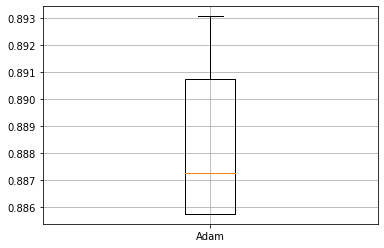

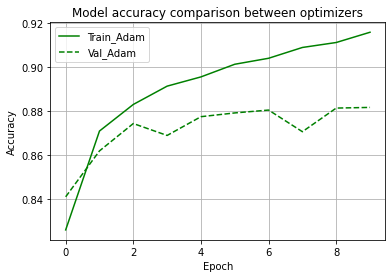

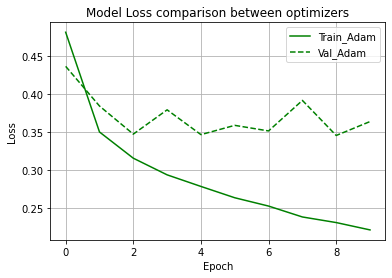

In [ ]:
# 연습문제 12 [프로그램 5-12]는 fashion MNIST 데이터셋에 대해 90% 가량의 정확률을 얻었다.
# 5장에서 배운 기법을 총동원 하여 다층 퍼셉트론의 성능을 최대한 끌어 올리시오.
# 이때 성능 측정은 교차 검증을 이용하시오.
# 이렇게 끌어올린 자신의 정확률과 하이퍼 매개변수값을 제시하시오.

# 12. 교차 검증을 이용한 옵티마이저의 성능 비교: SGD, Adam, Adagrad, RMSprop
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam,Adagrad,RMSprop
from sklearn.model_selection import KFold

def build_model(input, hidden, output, option_dict):
  model = Sequential()
  if len(hidden) == 0: model.add(Dense(units=output,input_shape=(input,),**option_dict[0]))
  else:
    model.add(Dense(units=hidden[0],input_shape=(input,),**option_dict[0]))
    for i in range(1,len(hidden)): model.add(Dense(units=hidden[i],**option_dict[i]))
    model.add(Dense(units=output,**option_dict[len(hidden)]))
  return model  

def cross_validation(opt,input,hidden,output,option_dict):
  accuracy = []
  for train_idx, val_idx in KFold(k).split(x_train):
    xtrain, xval = x_train[train_idx], x_train[val_idx]
    ytrain, yval = y_train[train_idx], y_train[val_idx]
    dmlp = build_model(input,hidden,output,option_dict)
    dmlp.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = dmlp.fit(xtrain, ytrain, batch_size=batch_size, epochs=n_epoch,validation_data=(x_test,y_test), verbose=1)
    accuracy.append(dmlp.evaluate(xval,yval,verbose=0)[1])
  return accuracy, hist

trans_input = lambda x : x.reshape(x.shape[0],x.shape[1]*x.shape[2]).astype(np.float32)/255.0
data_categorical = lambda y : tf.keras.utils.to_categorical(y,10)

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = trans_input(x_train)
x_test = trans_input(x_test)

y_train = data_categorical(y_train)
y_test = data_categorical(y_test)

# 신경망 구조 설정 
n_input = 784
n_hidden = [1024, 512]
n_output = 10

# 하이퍼 매개 변수 설정 
batch_size = 32
n_epoch = 10
k = 5

option = [{'activation':'relu', },
          {'activation':'relu', },
          {'activation':'softmax', }]

# 옵티마이저 4개에 대해 교차검증을 실행 
optimizers = [Adam]#[SGD, Adam, Adagrad, RMSprop]
acc = {}
hist = {}
for opt in optimizers: acc[opt], hist[opt] = cross_validation(opt(),n_input,n_hidden,n_output,option)
for opt in optimizers: print(opt.__name__, ' : ', np.array(acc[opt]).mean())

import matplotlib.pyplot as plt 
plt.boxplot([acc[opt] for opt in optimizers], labels=[opt.__name__ for opt in optimizers])
plt.grid()
plt.show()

graph_color = {
    SGD:'r',
    Adam:'g',
    Adagrad:'b',
    RMSprop:'m'    
}

# 네 모델의 정확률을 하나의 그래프에서 비교
for optimizer in (hist.keys()):
  plt.plot(hist[optimizer].history['accuracy'],graph_color[optimizer],label='Train_'+optimizer.__name__)
  plt.plot(hist[optimizer].history['val_accuracy'],graph_color[optimizer]+'--',label='Val_'+optimizer.__name__)

plt.title('Model accuracy comparison between optimizers')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

for optimizer in (hist.keys()):
  plt.plot(hist[optimizer].history['loss'],graph_color[optimizer],label='Train_'+optimizer.__name__)
  plt.plot(hist[optimizer].history['val_loss'],graph_color[optimizer]+'--',label='Val_'+optimizer.__name__)

plt.title('Model Loss comparison between optimizers')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='best')
plt.grid()
plt.show()



In [93]:
# 연습문제 13 프로그래밍을 잘 하지 못하면서 인공지능을 할 줄 안다고 생각하는 경우의 위험성을 
# 목공, 수영, 자전거 타기와 같은 일상생활의 일에 비유해 설명하시오.

# 목공에 비유하면 망치질도 못하면서 목공을 잘한다는 것이고 
# 수영에 비교하면 물에 뜨지도 못하면서 수영을 잘하는 것이고 
# 자전거 타기에 비유하면 페달을 밟지도 못하면서 자전거를 잘탄다는 것이다.